In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Perceptron Trick

[]

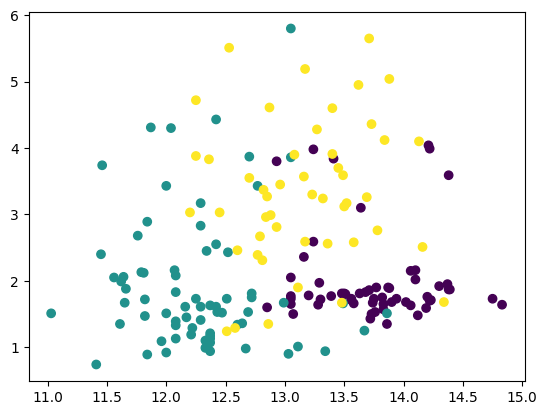

In [52]:
from sklearn.datasets import load_wine

x, y = load_wine(return_X_y=True)

plt.scatter(x[:,0], x[:,1], c=y)
plt.plot()

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2)

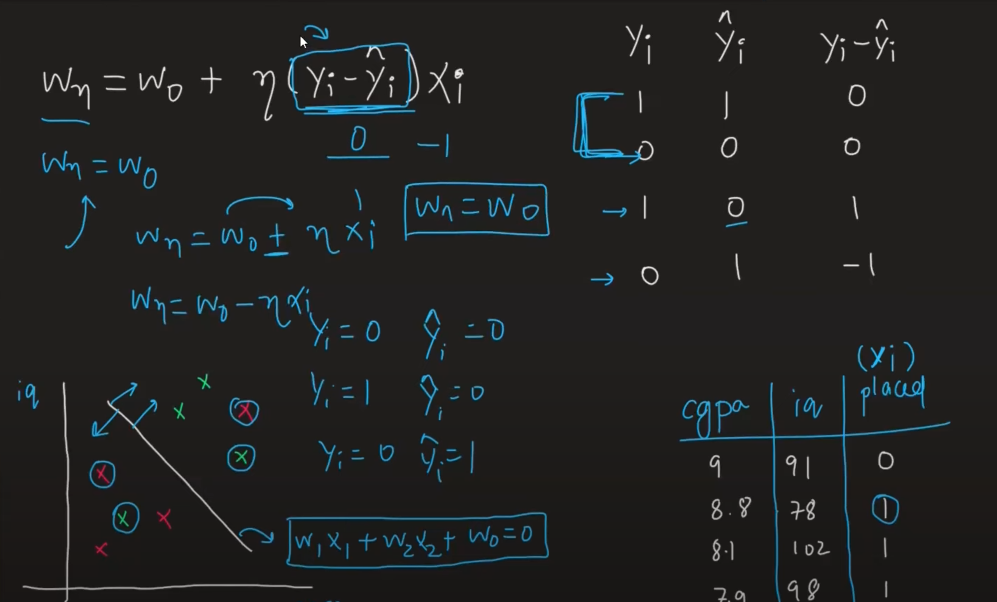

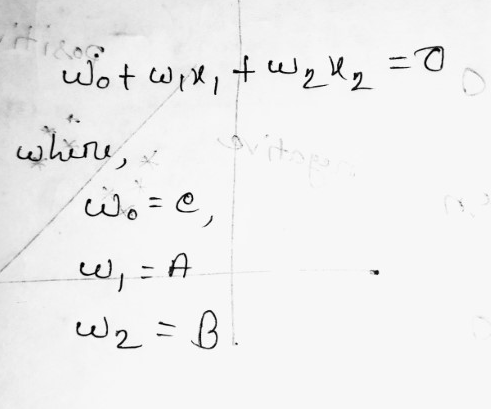

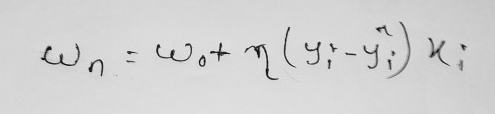

In [54]:
class Perceptron:
    def __init__(self, epochs, lr):
        self.epochs = epochs
        self.lr = lr
        self.weights = None

    def fit(self, x_train, y_train):
        x_train = np.insert(x_train, 0, 1, axis=1)
        weights = np.ones(x_train.shape[1])

        for _ in range(self.epochs):
            random = np.random.randint(0,x_train.shape[0])
            y_hat = self.step(np.dot(x_train[random], weights))
            weights = weights + self.lr * (y_train[random] - y_hat) * x_train[random]

        self.weights = weights
    
    def predict(self, x_test):
        x_test = np.insert(x_test, 0, 1, axis=1)
        predictions = np.dot(x_test, self.weights)
        return self.step(predictions)
    
    def step(self, z):
        return np.where(z > 0, 1, 0)

In [55]:
from sklearn.metrics import classification_report

p = Perceptron(epochs=100, lr=0.01)
p.fit(x_train, y_train)
y_pred = p.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.42      1.00      0.59        15
           2       0.00      0.00      0.00        11

    accuracy                           0.42        36
   macro avg       0.14      0.33      0.20        36
weighted avg       0.17      0.42      0.25        36



### Sklearn Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.93      0.93      0.93        15
           2       1.00      0.91      0.95        11

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



### Perceptron with Sigmoid

![0_D5do3xhv5ulF50w2 (Custom).png](<attachment:0_D5do3xhv5ulF50w2 (Custom).png>)
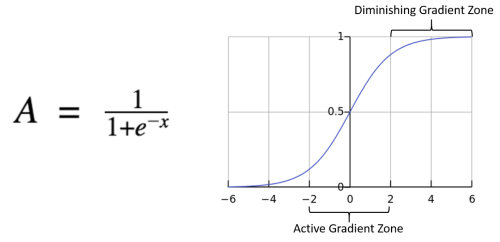

In [57]:
class SigmoidPerceptron:
    def __init__(self, epochs, lr):
        self.epochs = epochs
        self.lr = lr
        self.weights = None

    def fit(self, x_train, y_train):
        x_train = np.insert(x_train, 0, 1, axis=1)
        weights = np.ones(x_train.shape[1])

        for _ in range(self.epochs):
            random = np.random.randint(0, x_train.shape[0])
            y_hat = self.sigmoid(np.dot(x_train[random], weights))
            weights = weights + self.lr * (y_train[random]-y_hat)*x_train[random]

        self.weights = weights

    def predict(self, x_test, threshold=0.5):
        x_test = np.insert(x_test, 0, 1, axis=1)
        prediction = np.dot(x_test, self.weights)
        probabilities = self.sigmoid(prediction)
        binary_predictions = (probabilities >= threshold).astype(int)
        return binary_predictions
    
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

In [58]:
sp = SigmoidPerceptron(epochs=100, lr=0.01)
sp.fit(x_train, y_train)
y_pred = sp.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.42      1.00      0.59        15
           2       0.00      0.00      0.00        11

    accuracy                           0.42        36
   macro avg       0.14      0.33      0.20        36
weighted avg       0.17      0.42      0.25        36



### Why Perceptron Performing Bad

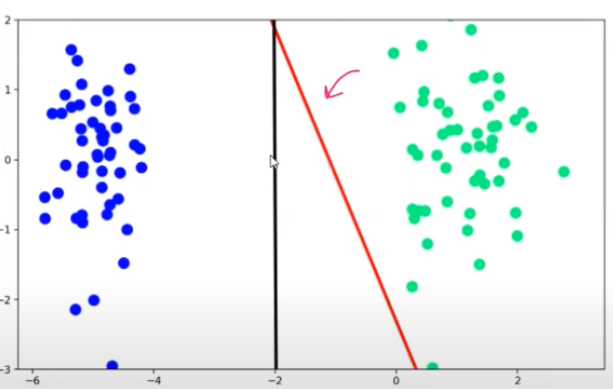

Perceptron divides the group into 2, while Logistic Regression divides the area into two equal parts.Ex: Black Line is Logistic Regression, Red Line is Perceptron

### Logistic Regression

![IMG_20240112_223546 (Custom).jpg](<attachment:IMG_20240112_223546 (Custom).jpg>)
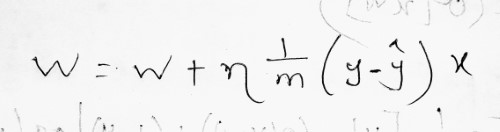

In [64]:
class MyLogisticRegression:
    def __init__(self, epochs, lr) -> None:
        self.epochs = epochs
        self.lr = lr
        self.weights = None
    
    def fit(self, x_train, y_train):
        x_train = np.insert(x_train, 0, 1, axis=1)
        self.weights = np.ones(x_train.shape[1])
        
        for _ in range(self.epochs):
            y_hat = self.sigmoid(np.dot(x_train, self.weights))
            self.weights = self.weights + self.lr * np.dot((y_train-y_hat), x_train)/x_train.shape[0]

    def predict(self, x_test, threshold=0.5):
        x_test = np.insert(x_test, 0, 1 , axis=1)
        prediction = np.dot(x_test, self.weights)
        probabilities = self.sigmoid(prediction)
        binary_predictions = (probabilities >= threshold).astype(int)
        return binary_predictions

    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))

In [67]:
mlr = MyLogisticRegression(epochs=1000, lr=0.01)
mlr.fit(x_train, y_train)
y_pred = mlr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.47      1.00      0.64        15
           2       0.00      0.00      0.00        11

    accuracy                           0.53        36
   macro avg       0.49      0.47      0.40        36
weighted avg       0.47      0.53      0.42        36

